The consumer credit department of a bank wants to automate the decisionmaking process for approval of home equity lines of credit. To do this, they will follow the recommendations of the Equal Credit Opportunity Act to create an empirically derived and statistically sound credit scoring model. The model will be based on data collected from recent applicants granted credit through the current process of loan underwriting. The model will be built from predictive modeling tools, but the created model must be sufficiently interpretable to provide a reason for any adverse actions (rejections).

In [1]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 39.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 KB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 2.8 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641945 sha256=5e3f3a4dcd29f6ca1c733d55c3c7ebfac305b2c1138a289663f4a66ecc971cee

# **DATA SETUP**

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
hmeq = fetch_openml(name="HMEQ_Data",version=1,as_frame=True)

In [3]:
df = hmeq['data']
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.0,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1.0,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1.0,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1.0,1500.0,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
df.shape

(5960, 13)

In [5]:
df.dtypes

BAD        float64
LOAN       float64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [6]:
df.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [7]:
df.isna().sum()/df.shape[0]*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True, stratify=df['BAD'])

# **EXPLORATORY DATA ANALYSIS**

In [9]:
df_train.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,4768.000000,4768.000000,4347.000000,4679.000000,4365.000000,4180.000000,4296.000000,4509.000000,4354.000000,4584.000000,3763.000000
mean,0.199455,18531.900168,73678.835335,101640.012127,8.913253,0.256699,0.456704,179.501872,1.188792,21.277269,33.760828
std,0.399632,11230.906348,44250.790495,56972.625494,7.602820,0.848906,1.149576,86.217309,1.724861,10.228660,8.316636
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11000.000000,46122.000000,66192.500000,3.000000,0.000000,0.000000,115.558530,0.000000,14.000000,29.201439
50%,0.000000,16200.000000,65022.000000,89250.000000,7.000000,0.000000,0.000000,173.495392,1.000000,20.000000,34.802429
75%,0.000000,23300.000000,91731.500000,119780.000000,13.000000,0.000000,0.000000,230.072131,2.000000,26.000000,38.961062
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


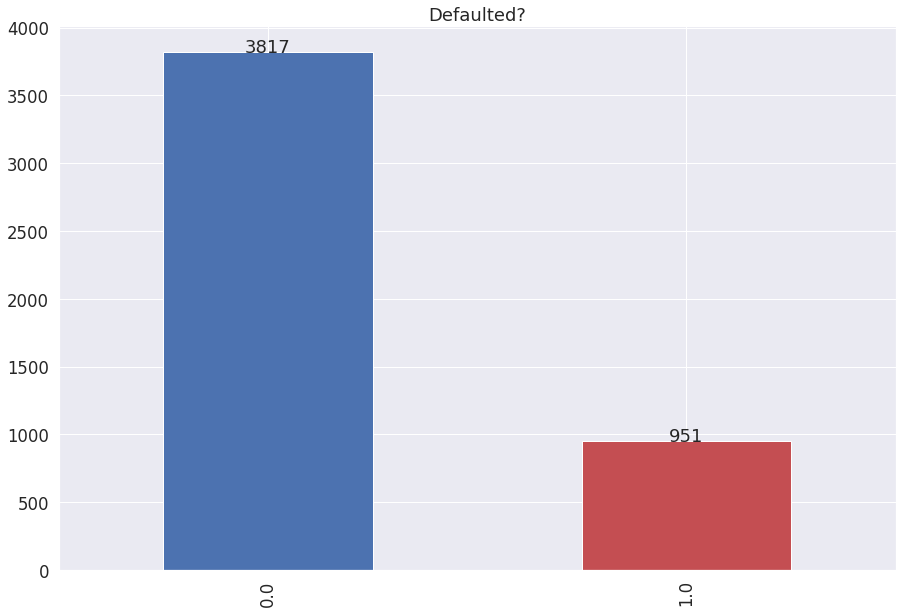

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

df_train["BAD"].value_counts().plot(kind='bar', color=['C0', 'C3'], figsize=(15, 10))
# 'C7' is Grey
# plt.xlabel("Loan Approval", labelpad=14)
# plt.ylabel("Count of Records", labelpad=14)
plt.title("Defaulted?")
df_train["BAD"].value_counts()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(df_train["BAD"].value_counts().index, df_train["BAD"].value_counts().values)

In [11]:
df_train['REASON'].fillna(df_train['REASON'].mode()[0],inplace = True)
df_test['REASON'].fillna(df_test['REASON'].mode()[0],inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


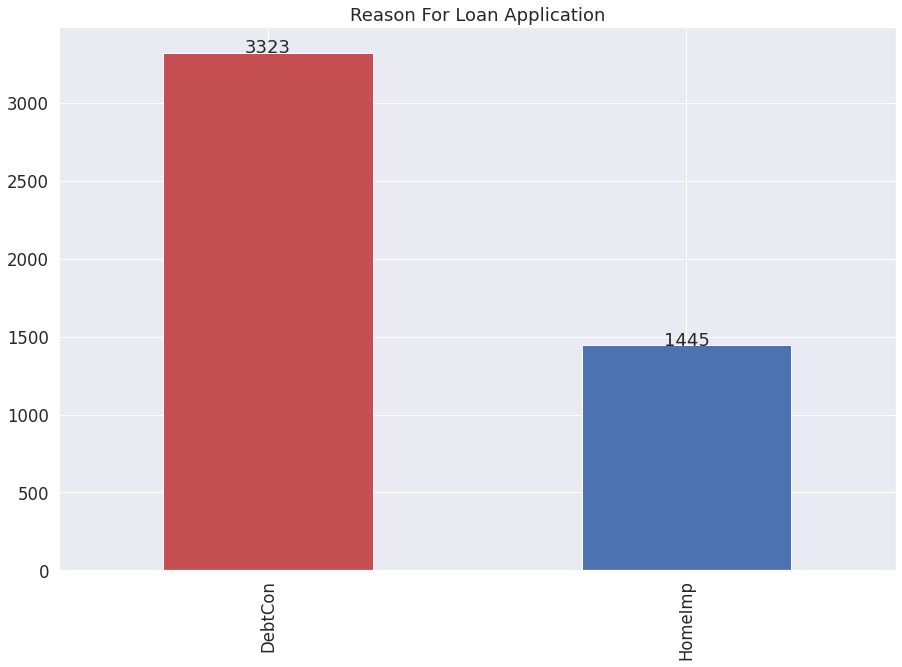

In [12]:
df_train["REASON"].value_counts().plot(kind='bar', color=['C3', 'C0'], figsize=(15, 10))
plt.title("Reason For Loan Application")
addlabels(df_train["REASON"].value_counts().index, df_train["REASON"].value_counts().values)

In [13]:
df_train['JOB'].fillna(df_train['JOB'].mode()[0],inplace = True)
df_test['JOB'].fillna(df_test['JOB'].mode()[0],inplace = True)

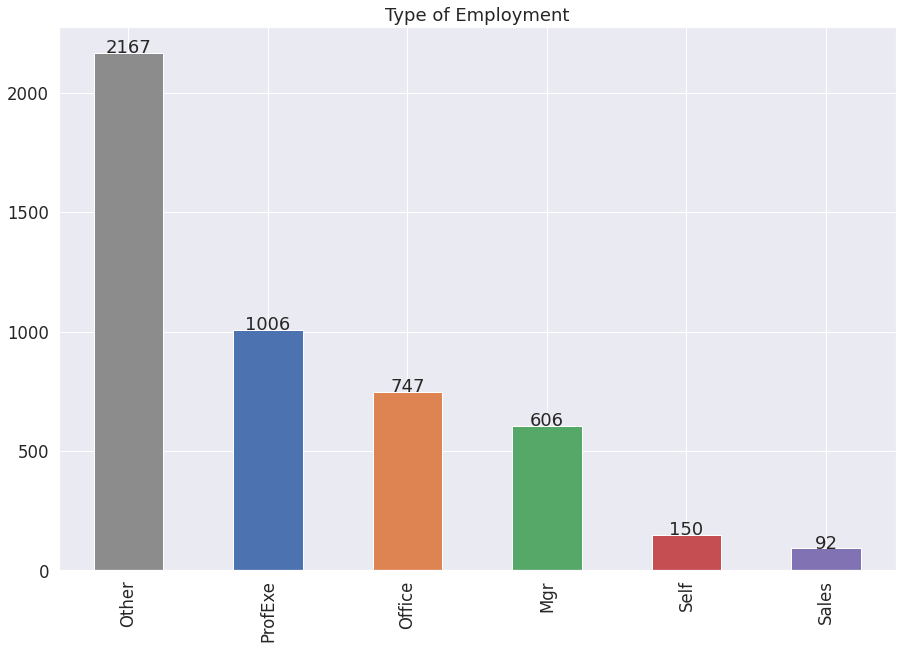

In [14]:
df_train["JOB"].value_counts().plot(kind='bar', color=['C7','C0','C1','C2','C3','C4'], figsize=(15, 10))
plt.title("Type of Employment")
addlabels(df_train["JOB"].value_counts().index, df_train["JOB"].value_counts().values)

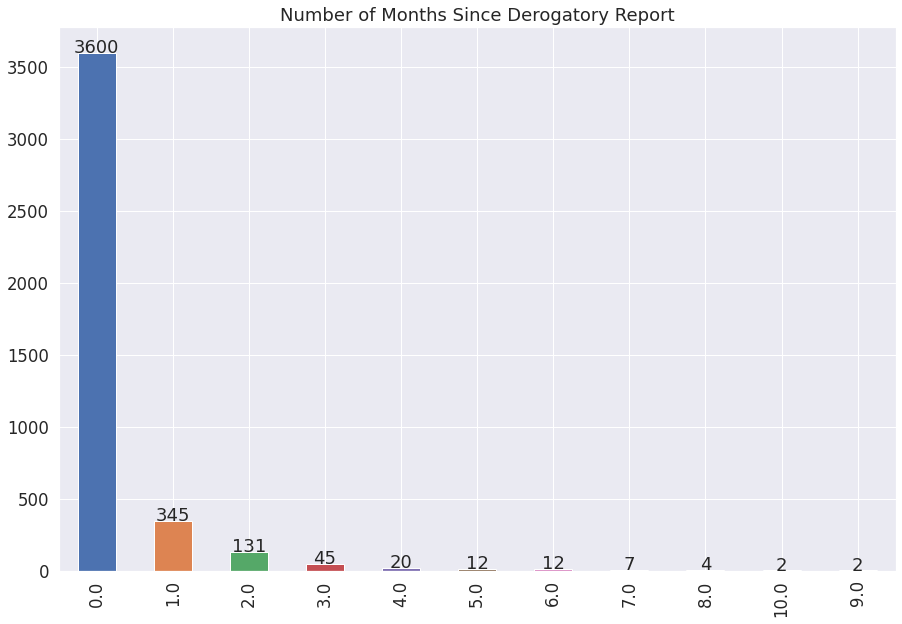

In [15]:
df_train["DEROG"].value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9'], figsize=(15, 10))
plt.title("Number of Months Since Derogatory Report")
addlabels(df_train["DEROG"].value_counts().index, df_train["DEROG"].value_counts().values)

In [16]:
df_train['DELINQ'].fillna(df_train['DELINQ'].mode()[0],inplace = True)
df_test['DELINQ'].fillna(df_test['DELINQ'].mode()[0],inplace = True)

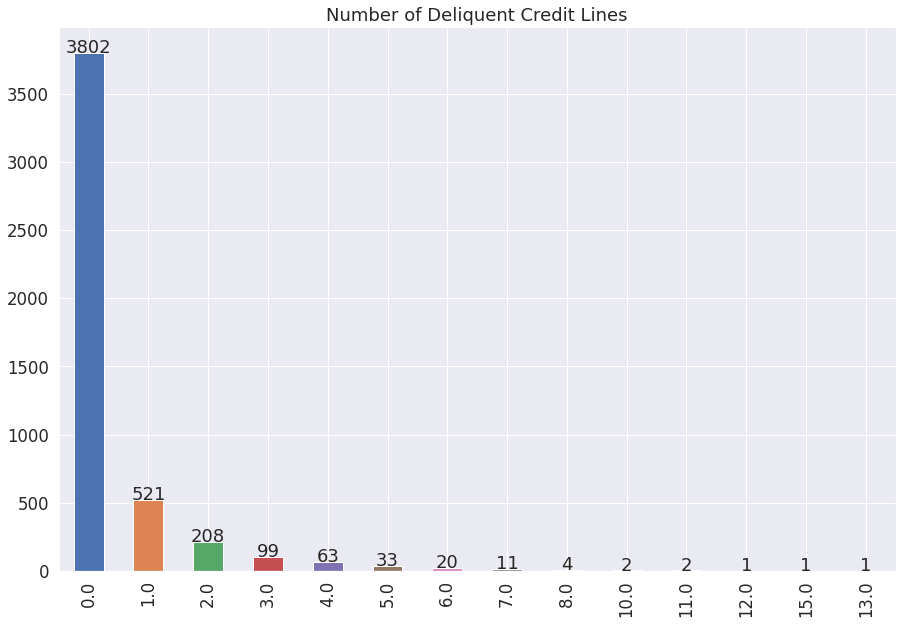

In [17]:
df_train["DELINQ"].value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9'], figsize=(15, 10))
plt.title("Number of Deliquent Credit Lines")
addlabels(df_train["DELINQ"].value_counts().index, df_train["DELINQ"].value_counts().values)

In [18]:
df_train['NINQ'].fillna(df_train['NINQ'].mode()[0],inplace = True)
df_test['NINQ'].fillna(df_test['NINQ'].mode()[0],inplace = True)

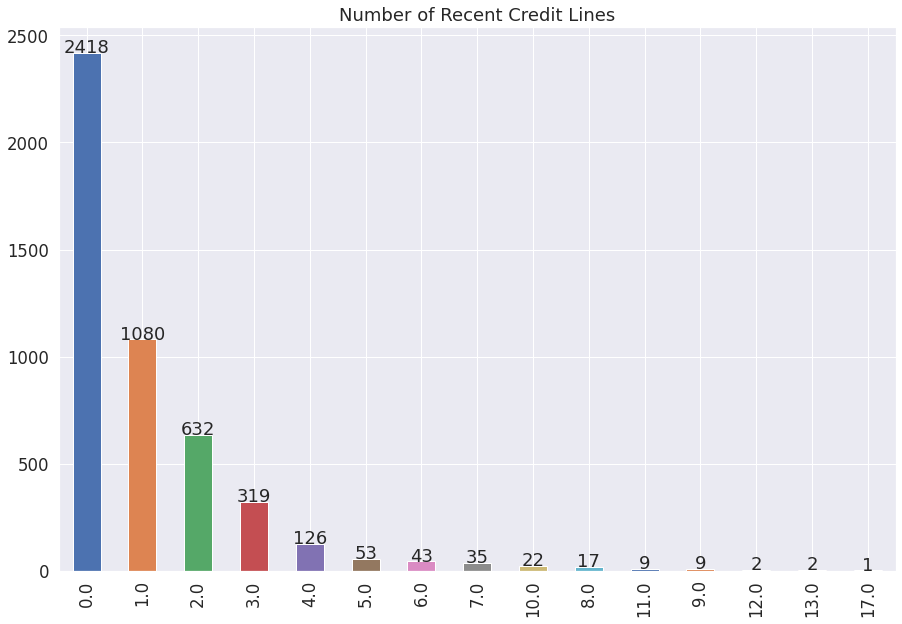

In [19]:
df_train["NINQ"].value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9'], figsize=(15, 10))
plt.title("Number of Recent Credit Lines")
addlabels(df_train["NINQ"].value_counts().index, df_train["NINQ"].value_counts().values)

In [20]:
def ft_understanding_num(num_ft):
  print("Skew : ", '{:1.3f}'.format(df_train[num_ft].skew()))
  print("Kurtosis : ", '{:1.3f}'.format(df_train[num_ft].kurtosis()))
  fig, ax = plt.subplots(figsize=(15, 10))
  sns.histplot(df_train[num_ft], kde=True, ax=ax)
  plt.show()

In [21]:
df_train['LOAN'].fillna(df_train['LOAN'].median(),inplace = True)
df_test['LOAN'].fillna(df_test['LOAN'].median(),inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Skew :  2.046
Kurtosis :  7.089


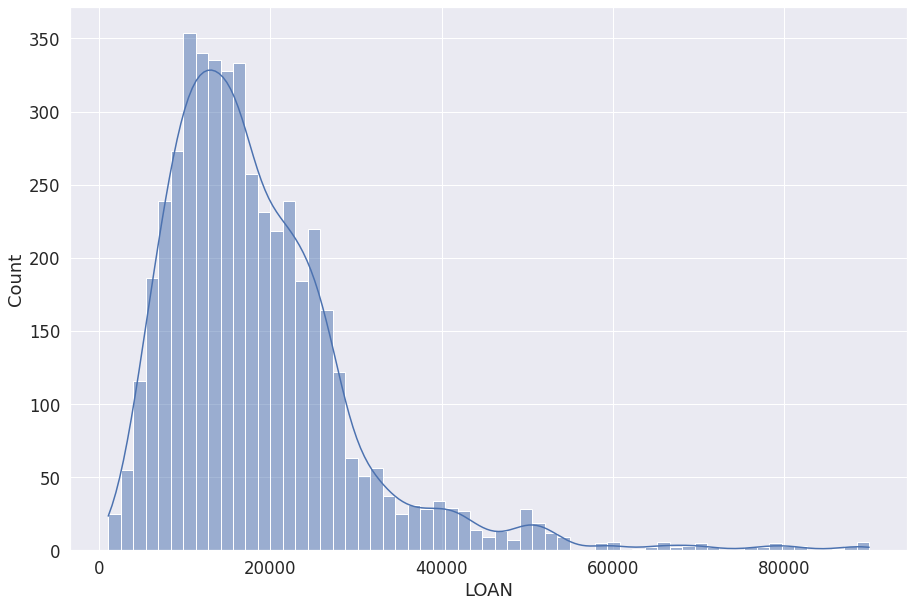

In [22]:
ft_understanding_num('LOAN')

In [23]:
df_train['MORTDUE'].fillna(df_train['MORTDUE'].median(),inplace = True)
df_test['MORTDUE'].fillna(df_test['MORTDUE'].median(),inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Skew :  1.935
Kurtosis :  7.441


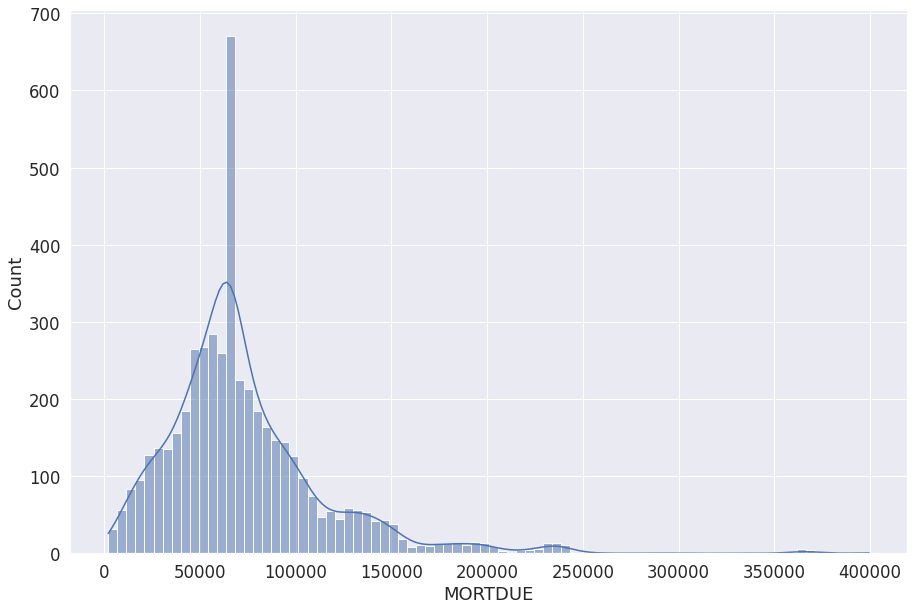

In [24]:
ft_understanding_num('MORTDUE')

In [25]:
df_train['VALUE'].fillna(df_train['VALUE'].median(),inplace = True)
df_test['VALUE'].fillna(df_test['VALUE'].median(),inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Skew :  3.024
Kurtosis :  24.095


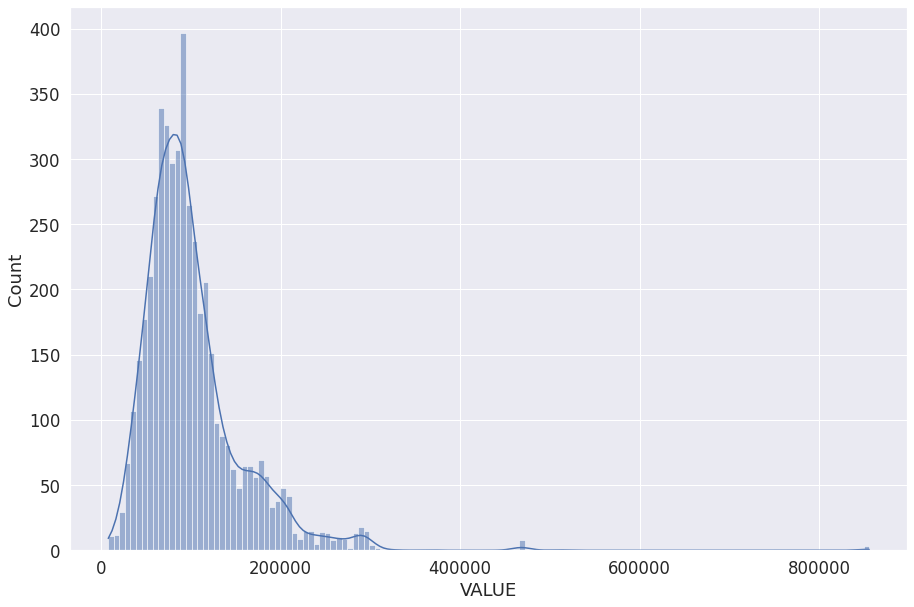

In [26]:
ft_understanding_num('VALUE')

In [27]:
df_train['YOJ'].fillna(df_train['YOJ'].mode()[0],inplace = True)
df_test['YOJ'].fillna(df_test['YOJ'].mode()[0],inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Skew :  1.034
Kurtosis :  0.430


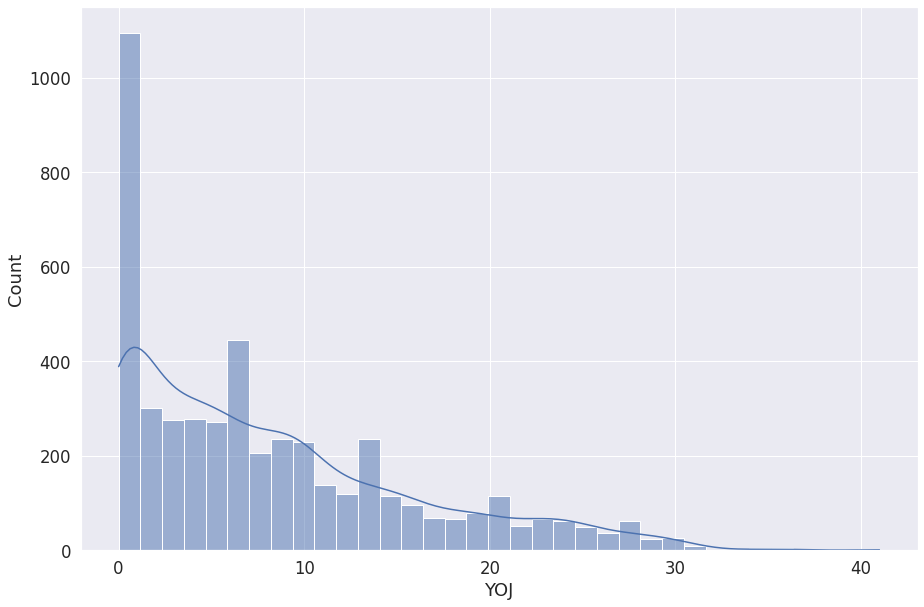

In [28]:
ft_understanding_num('YOJ')

In [29]:
df_train['CLAGE'].fillna(df_train['CLAGE'].median(),inplace = True)
df_test['CLAGE'].fillna(df_test['CLAGE'].median(),inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Skew :  1.498
Kurtosis :  9.582


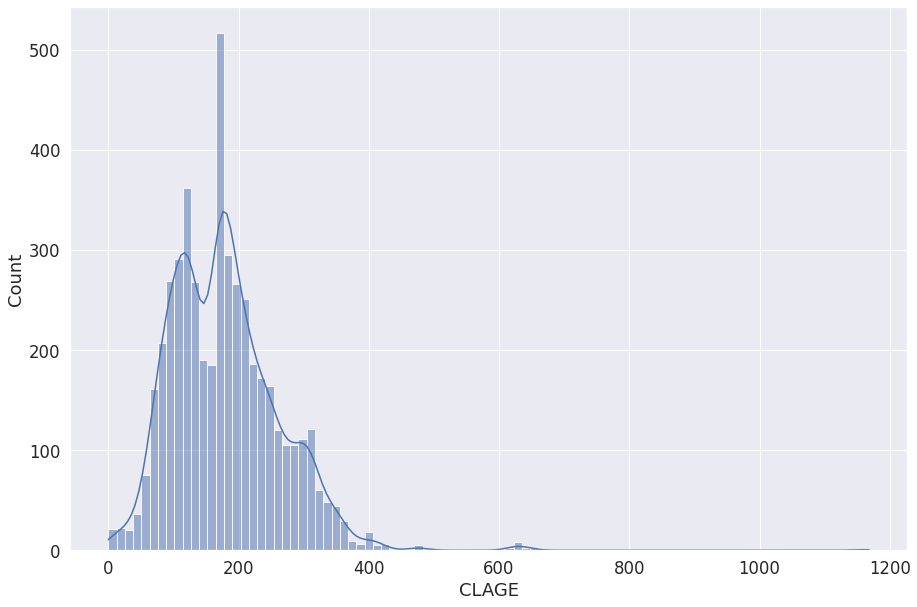

In [30]:
ft_understanding_num('CLAGE')

In [31]:
df_train['CLNO'].fillna(df_train['CLNO'].mode()[0],inplace = True)
df_test['CLNO'].fillna(df_test['CLNO'].mode()[0],inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Skew :  0.850
Kurtosis :  1.374


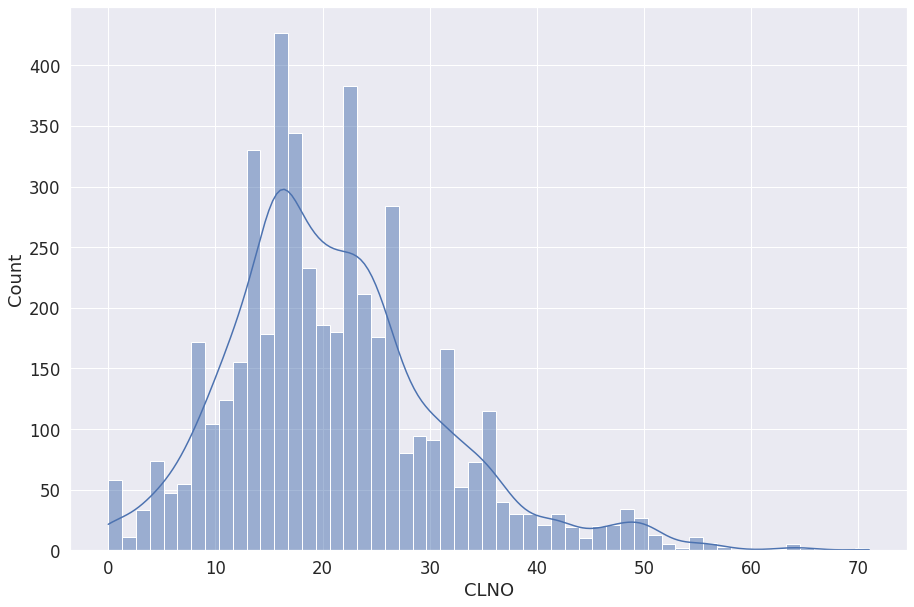

In [32]:
ft_understanding_num('CLNO')

In [33]:
df_train['DEBTINC'].fillna(df_train['DEBTINC'].median(),inplace = True)
df_test['DEBTINC'].fillna(df_test['DEBTINC'].median(),inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Skew :  2.797
Kurtosis :  67.951


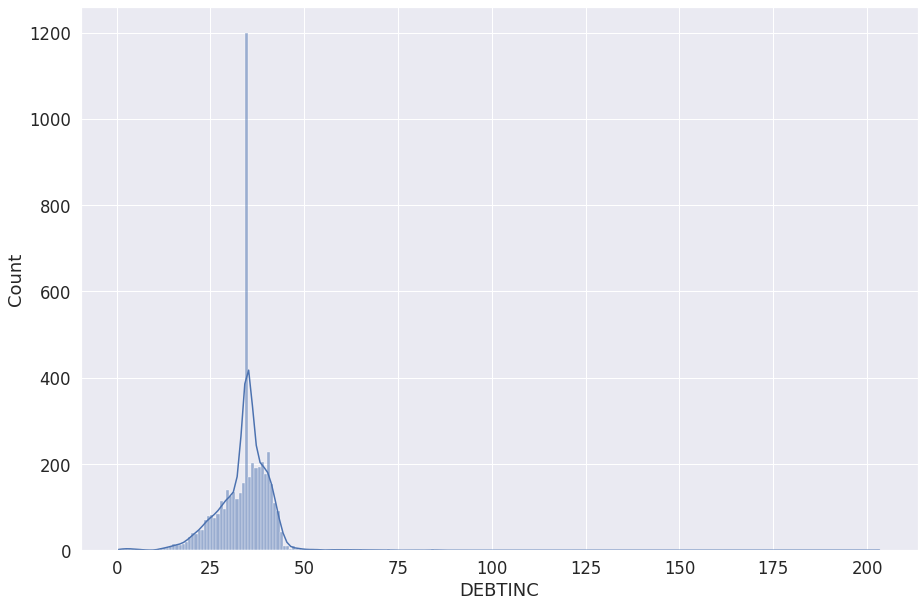

In [34]:
ft_understanding_num('DEBTINC')

#Feature Engineer FICO Score

In [35]:
df_train['GOODCL'] = df_train['CLNO']-df_train['DELINQ']
df_test['GOODCL'] = df_test['CLNO']-df_test['DELINQ']

<ipython-input-35-9db356ab7bef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['GOODCL'] = df_train['CLNO']-df_train['DELINQ']
<ipython-input-35-9db356ab7bef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['GOODCL'] = df_test['CLNO']-df_test['DELINQ']


In [36]:
def payment_history(drg):
  payhist = 75
  if drg >= 23:
    payhist = 55
  elif drg >= 12:
    payhist = 25
  elif drg >= 6:
    payhist = 15
  elif drg >= 0:
    payhist = 10
  return payhist

df_train['PAYHIST'] = df_train['DEROG'].apply(lambda x: payment_history(x))
df_train.drop('DEROG',axis=1,inplace=True)

df_test['PAYHIST'] = df_test['DEROG'].apply(lambda x: payment_history(x))
df_test.drop('DEROG',axis=1,inplace=True)

<ipython-input-36-f39e86898875>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['PAYHIST'] = df_train['DEROG'].apply(lambda x: payment_history(x))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-36-f39e86898875>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [37]:
df_train['MONTHLYDEBT'] = (df_train['VALUE']-df_train['MORTDUE'])/(df_train['CLAGE']/(df_train['GOODCL']))
df_test['MONTHLYDEBT'] = (df_test['VALUE']-df_test['MORTDUE'])/(df_test['CLAGE']/(df_test['GOODCL']))

def outstanding_debt(md):
  debt = 30
  if md >= 1000:
    debt = 15
  elif md >= 750:
    debt = 25
  elif md >= 500:
    debt = 40
  elif md >= 100:
    debt = 50
  elif md >= 1:
    debt = 65
  elif md == 0:
    debt = 55
  return debt

df_train['OUTDEBT'] = df_train['MONTHLYDEBT'].apply(lambda x: outstanding_debt(x))
df_train.drop('MONTHLYDEBT',axis=1,inplace=True)

df_test['OUTDEBT'] = df_test['MONTHLYDEBT'].apply(lambda x: outstanding_debt(x))
df_test.drop('MONTHLYDEBT',axis=1,inplace=True)

<ipython-input-37-692291e894f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['MONTHLYDEBT'] = (df_train['VALUE']-df_train['MORTDUE'])/(df_train['CLAGE']/(df_train['GOODCL']))
<ipython-input-37-692291e894f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['MONTHLYDEBT'] = (df_test['VALUE']-df_test['MORTDUE'])/(df_test['CLAGE']/(df_test['GOODCL']))
<ipython-input-37-692291e894f7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [38]:
def credit_history(cl):
  if cl > 48:
    chpoint = 75
  elif cl >= 24:
    chpoint = 60
  elif cl >= 12:
    chpoint = 35
  elif cl < 12:
    chpoint = 12
  return chpoint

df_train['CHLEN'] = df_train['CLAGE'].apply(lambda x: credit_history(x))
df_test['CHLEN'] = df_test['CLAGE'].apply(lambda x: credit_history(x))

<ipython-input-38-e3494404c3fd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['CHLEN'] = df_train['CLAGE'].apply(lambda x: credit_history(x))
<ipython-input-38-e3494404c3fd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['CHLEN'] = df_test['CLAGE'].apply(lambda x: credit_history(x))


In [39]:
def new_credit_pursuit(inq):
  if inq == 0:
    ncp = 70
  elif inq == 1:
    ncp = 60
  elif inq == 2:
    ncp = 45
  elif inq == 3:
    ncp = 25
  elif inq >= 4:
    ncp = 20
  return ncp
  
df_train['NCPURS'] = df_train['NINQ'].apply(lambda x: new_credit_pursuit(x))
df_test['NCPURS'] = df_test['NINQ'].apply(lambda x: new_credit_pursuit(x))

<ipython-input-39-8803564201a0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['NCPURS'] = df_train['NINQ'].apply(lambda x: new_credit_pursuit(x))
<ipython-input-39-8803564201a0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['NCPURS'] = df_test['NINQ'].apply(lambda x: new_credit_pursuit(x))


In [40]:
def credit_mix(goodcl):
  cm = 0
  if goodcl == 0:
    cm = 15
  elif goodcl == 1:
    cm = 25
  elif goodcl == 2:
    cm = 50
  elif goodcl == 3:
    cm = 60
  elif goodcl >= 4:
    cm = 50
  return cm

df_train['CRMIX'] = df_train['GOODCL'].apply(lambda x: credit_mix(x))
df_test['CRMIX'] = df_test['GOODCL'].apply(lambda x: credit_mix(x))

<ipython-input-40-6514eddf8190>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['CRMIX'] = df_train['GOODCL'].apply(lambda x: credit_mix(x))
<ipython-input-40-6514eddf8190>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['CRMIX'] = df_test['GOODCL'].apply(lambda x: credit_mix(x))


In [41]:
df_train['FICO'] = df_train['PAYHIST'] + df_train['OUTDEBT'] + df_train['CHLEN'] + df_train['NCPURS'] + df_train['CRMIX']
df_train.drop(['GOODCL','PAYHIST','OUTDEBT','CHLEN','NCPURS','CRMIX'],axis=1,inplace=True)

df_test['FICO'] = df_test['PAYHIST'] + df_test['OUTDEBT'] + df_test['CHLEN'] + df_test['NCPURS'] + df_test['CRMIX']
df_test.drop(['GOODCL','PAYHIST','OUTDEBT','CHLEN','NCPURS','CRMIX'],axis=1,inplace=True)

<ipython-input-41-fe854d7e6a52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['FICO'] = df_train['PAYHIST'] + df_train['OUTDEBT'] + df_train['CHLEN'] + df_train['NCPURS'] + df_train['CRMIX']
<ipython-input-41-fe854d7e6a52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['FICO'] = df_test['PAYHIST'] + df_test['OUTDEBT'] + df_test['CHLEN'] + df_test['NCPURS'] + df_test['CRMIX']


<Figure size 432x288 with 0 Axes>

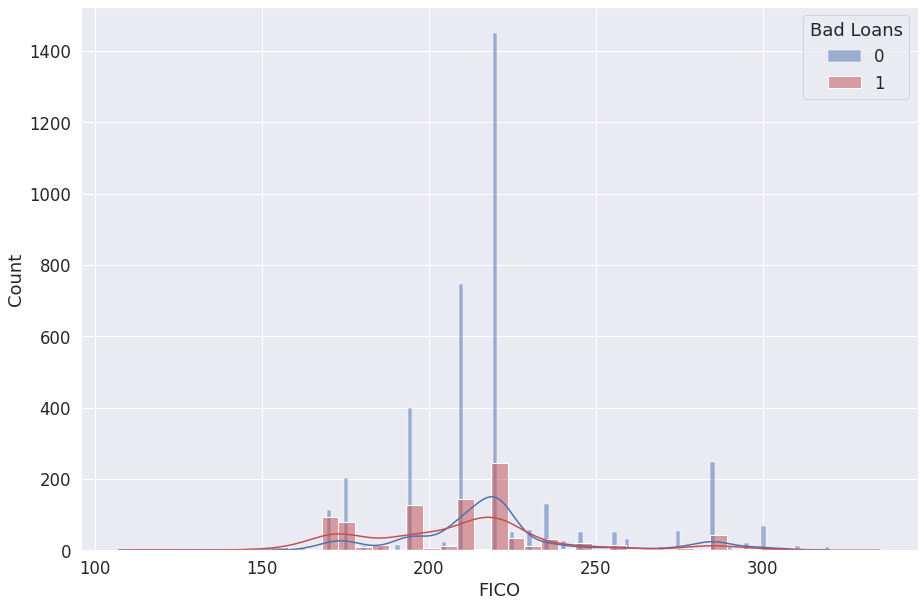

In [42]:
plt.figure()
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df_train['FICO'][df_train['BAD']==0], kde = True,
             label = 0, color='C0', ax=ax)
sns.histplot(df_train['FICO'][df_train['BAD']==1], kde = True,
             label = 1, color='C3', ax=ax)
plt.legend(title="Bad Loans")

#Mutual Information

In [43]:
X = df_train.copy()
y = X.pop("BAD")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [44]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

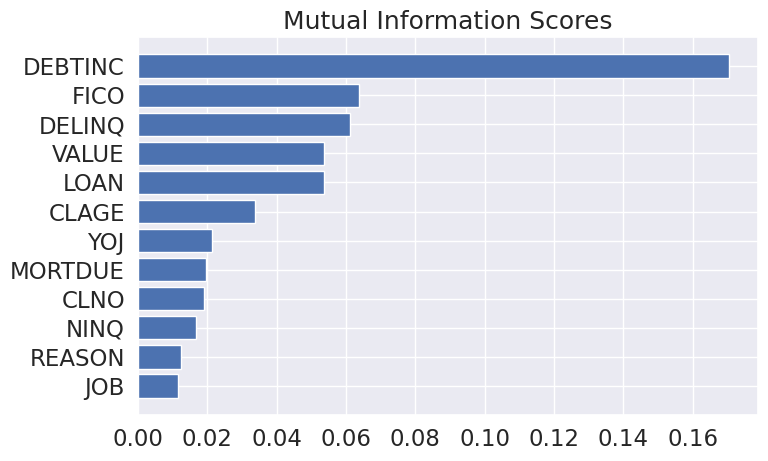

In [45]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [46]:
def remove_outlier(data):
  df_temp = data.copy()
  num = list(df_temp.drop('BAD',axis=1).select_dtypes(include=['int64','float64']).columns)
  for col in num:
    Q1 = np.percentile(df_temp[col], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df_temp[col], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    df_temp = df_temp[df_temp[col] >= (Q1-1.5*IQR)]
    df_temp = df_temp[df_temp[col] <= (Q3+1.5*IQR)]
  return df_temp

# Remove outliers from training and testing datasets
df_train = remove_outlier(df_train)
df_test = remove_outlier(df_test)

# assign new training and testing labels from the reduced training and testing datasets with outlier values removed
train_label = df_train["BAD"]
test_label =df_test["BAD"]

# drop target variable columns in both the training and testing datasets
df_train.drop("BAD",axis=1,inplace=True)
df_test.drop("BAD",axis=1,inplace=True)

# BUILD ENSEMBLE MODEL

In [47]:
import autosklearn.classification

In [48]:
autosklearn_classifier = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task = 80,
    per_run_time_limit = 20,
)

In [49]:
autosklearn_classifier.fit(df_train,train_label)

/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column REASON has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column JOB has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(


AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=20, time_left_for_this_task=80)

In [50]:
print(autosklearn_classifier.leaderboard())

          rank  ensemble_weight           type      cost  duration
model_id                                                          
8            1             0.42       adaboost  0.073871  4.759005
2            2             0.14  random_forest  0.076607  3.081990
9            3             0.44       adaboost  0.106703  2.788982


In [51]:
from sklearn.metrics import classification_report

print(classification_report(test_label, autosklearn_classifier.predict(df_test)))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       516
         1.0       1.00      0.23      0.38        69

    accuracy                           0.91       585
   macro avg       0.95      0.62      0.66       585
weighted avg       0.92      0.91      0.88       585



The Recall value of the target variable corresponding to the value '1.0' (representing instances of Bad Loans) at only 23% might seem detrimental, however the HMEQ Dataset is an unusual one in the sense that the favourable class (in this case 0.0 values in the 'BAD' column) outnumbers the unfavourable ones. By also considering the precision metric of the 'BAD' attribute values equal to '1.0' at 91%, the ensemble model doesn't appear to be a bad one. This means that with a precision score of 91%, there are only 9% of values classified as good loans that are actually bad ones and since there are more good loans than bad loans in the dataset, this should reduce the impact of the model's unreliability when it comes to classifying bad loans as good ones even though this still indicates that the model is superior when it comes to preventing the misclassification of good loans at bad ones but is still quiet unreliable as it tends to classify bad loans as good ones (which is not ideal for a credit risk modelling ML Based classifier)